## 16. MOS Fundamentals
### 16.1 Ideal Structure Definition
### 16.2 Electrostatics-Mostly Qualitative
### 16.2.1 Visualization Aids
#### Energy Band Diagram
#### Block Charge Diagrams
### 16.2.2 Effect of an Applied Bias
#### General Obsevations
#### Specific Biasing Regions

### 16.3 Electrostatics Quantitative Formulation
### 16.3.1 Semiconductor Electrostatics
#### Preparatory Considerations

$\psi, \pi, \phi, \Phi, \epsilon, \varepsilon, \mathcal{E}$\
$\phi$ electrostatic potential inside the semiconductor component of an MOS device\
$\Phi_B$ surface potential-energy barrier height in an MS diode\
$\Phi_{B0}$   $\Phi_B$ barrier height when $\mathcal{E}=0$ at the MS interface \
$\phi_F$ reference voltage related to the semiconductor doping concentration\
$\Phi_M$ metal workfunction\
$\Phi_M' =\Phi_M - \chi_i$ effective metal workfunction in an MOS structure\
$\phi_{MS}$ metal-semiconductor workfunction difference expressed in volts\
$\phi_{ox}$ voltage inside the oxide\
$\Phi_S$ semiconductor workfunction\
$\phi_S$ semiconductor surface potential

$$\phi(x)=\frac{1}{q}[E_i(bulk)-E_i(x)] $$
$$\phi_S=\frac{1}{q}[E_i(bulk)-E_i(surface)] $$
$$\phi_F=\frac{1}{q}[E_i(bulk)-E_F] $$
$\phi_F$ is clearly related to the semiconductor doping\
$\phi_F>0$ p-type, $\phi_F<0$ n-type. 
$$p_{bulk}=n_ie^{[E_i(bulk)-E_F]/kT}=N_A \quad if\ N_A\gg N_D $$
$$n_{bulk}=n_ie^{[E_F-E_i(bulk)]/kT}=N_D \quad if\ N_D\gg N_A $$
$$\phi_F= 
\begin{cases}
\frac{kT}{q}ln(N_A/n_i) & p-type\ semiconductor \\
-\frac{kT}{q}ln(N_D/n_i) & n-type\ semiconductor
\end{cases} $$
$\phi_S=2\phi_F $ at the depletion-inversion transition point

In [3]:
# Exercise 16.3
from constant import q,m0,e0,hbar,mn,e_si,k,kB,mp,kT_q,Eg,Nc,Nv,ni,mun,mup
import numpy as np, matplotlib.pyplot as plt

T=300
F=9; S=20

phiF=F*k*T; phiS=S*k*T
ptype = "p-type" if phiF > 0 else "n-type"
print(f"semicondutor={ptype}, phiF={phiF:.2f}V, phiS={phiS:.2f}V")

if (phiF > 0 and phiS < 0) or (phiF < 0 and phiS > 0): print("accumulation")
elif 0 < np.abs(phiS) < 2 * np.abs(phiF): print("Depletion")
else: print("Inversion")

semicondutor=p-type, phiF=0.23V, phiS=0.52V
Inversion


#### Delta-Depletion Solution
**rho vs x: Exact solutin을 Pirret 책의 F(U)로 풀려고 했는데 U' 적분이 있어서 풀지 못하고
전체 수식을 전개한 풀이로 구하였다. 161. MOS enegery band.ipynb를 참조하세요.**

$$\rho=q(p-n+N_D-N_A) \cong -qN_A \quad (0\le x \le W) $$
$$\frac{d\mathcal{E}}{dx}=\frac{\rho}{K_s\varepsilon_0}\cong-\frac{qN_A}{K_s \varepsilon_0}\quad (0\le x \le W) $$
$$\mathcal{E}(x)=-\frac{d\phi}{dx}=\frac{qN_A}{K_s \varepsilon_0}(W-x) \quad (0\le x \le W) $$
$$\phi (x)=\frac{qN_A}{2K_s \varepsilon_0}(W-x)^2 \quad (0\le x \le W) $$
$$\phi_0 =\frac{qN_A}{2K_s \varepsilon_0}W^2  $$ 
$$W =\left[\frac{2K_s \varepsilon_0}{qN_A}\phi_s \right]^{1/2}$$ 
the maximum attainable equilibrium depletion width
$$W_T =\left[\frac{2K_s \varepsilon_0}{qN_A}(2\phi_s) \right]^{1/2}$$ 

UF=13.82, 2UF=27.63
VG_2UF=1.28
2.5UF=34.54, VG_2.5UF=4.42
nconc at 2.5UF=1.00e+19, NA- at UF=1.00e+16
43.500028268509176


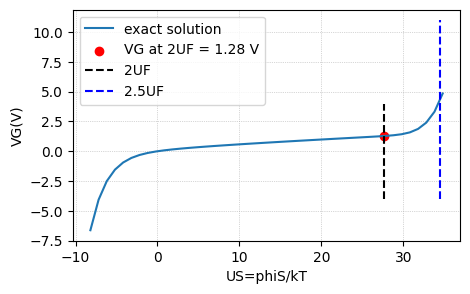

In [5]:
# Fig 16.10
# Appendix B page 749
from constant import q,m0,e0,hbar,mn,e_si,k,kB,mp,kT_q,Eg,Nc,Nv,ni,mun,mup,e_ox
import numpy as np, matplotlib.pyplot as plt

T=300
kT=k*T; ni=ni(T); Ks=e_si
LD=np.sqrt((Ks*e0*kT)/(2*q*ni))
xo=400*1e-8
Net=-1e16 #Net=ND-NA
N=np.abs(Net); sign=-Net/N
UF=sign*np.log(N/ni)
print(f"UF={UF:.2f}, 2UF={2*UF:.2f}")

US=np.arange(UF-22,UF+22,1)
S=US/abs(US)
F=np.sqrt(np.exp(UF)*(np.exp(-US)+US-1)+np.exp(-UF)*(np.exp(US)-US-1))
VG=kT*(US+S*(e_si*xo)/(e_ox*LD)*F)

# 2UF에서의 VG 값 계산
VG_2UF = np.interp(2*UF, US, VG)  # 보간법으로 VG 값 찾기
print(f"VG_2UF={VG_2UF:.2f}")

VG_25UF = np.interp(2.5*UF, US, VG)  # 보간법으로 VG 값 찾기
print(f"2.5UF={2.5*UF:.2f}, VG_2.5UF={VG_25UF:.2f}")
nconc=ni*np.exp(-(UF-2.5*UF))
na=ni*np.exp(UF)
print(f"nconc at 2.5UF={nconc:.2e}, NA- at UF={na:.2e}")
print(Eg(T)/kT)

plt.figure(figsize=(5,3))
plt.plot(US,VG,label="exact solution")
plt.scatter([2*UF], [VG_2UF], color="red", label=f"VG at 2UF = {VG_2UF:.2f} V")
plt.plot([2*UF,2*UF],[-4,4],"k--",label="2UF")
plt.plot([2.5*UF,2.5*UF],[-4,11],"b--",label="2.5UF")
#plt.ylim(-4,4) #, plt.xlim(-10,40)
plt.xlabel("US=phiS/kT"), plt.ylabel("VG(V)")
plt.grid(True, which='both', linestyle=':', linewidth=0.5)
plt.legend()
plt.show()
# 그러니까 2.5UF이상에서는 VG증가에 따라 Energy의 증가가 매우 천천히 증가하게된다.
# 대부분 VG는 nconc의 증가에 사용된다.

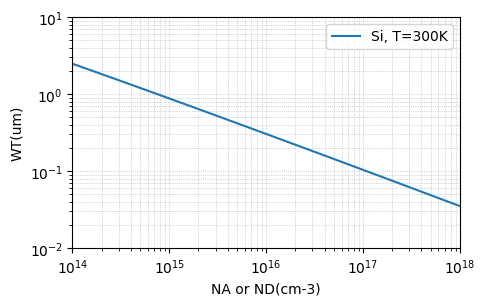

In [6]:
# Fig 16.9 
# WT vs NA or ND
from constant import q,m0,e0,hbar,mn,e_si,k,kB,mp,kT_q,Eg,Nc,Nv,ni,mun,mup,e_ox
import numpy as np, matplotlib.pyplot as plt

T=300; Ks=e_si; kT=k*T; ni=ni(T)
Net=np.logspace(14,18,101)
phif=kT*np.log(Net/ni)
WT=np.sqrt(2*Ks*e0/(q*Net)*(2*phif))

plt.figure(figsize=(5,3))
plt.loglog(Net, WT*1e4, label="Si, T=300K")
plt.xlabel("NA or ND(cm-3)"), plt.ylabel("WT(um)")
plt.xlim(1e14, 1e18), plt.ylim(1e-2,10)
plt.grid(True, which='both', linestyle=':', linewidth=0.5)
plt.legend()
plt.show()

### 16.3.2 Gate Voltage Relationship
$$V_G=\phi_s+\frac{K_s}{K_O}xo\sqrt{\frac{2qN_A}{K_s \varepsilon_0}\phi_s} \quad (0\le \phi_s \le 2\phi_F) $$
**Exercise 16.3**\
$\frac{\phi_F}{kT/q}=ln(N_A/n_i) $\
$W =\left[\frac{2K_s \varepsilon_0}{qN_A}\phi_s \right]^{1/2}$ at $\phi_s = \phi_F$\
$\mathcal{E}(x)=-\frac{d\phi}{dx}=\frac{qN_A}{K_s \varepsilon_0}(W-x)$ at $\phi_s = \phi_F, x=0 $ \
$V_G=\phi_s+\frac{K_s}{K_O}x_0\sqrt{\frac{2qN_A}{K_s \varepsilon_0}\phi_s} \quad (0\le \phi_s \le 2\phi_F) $

In [12]:
# Exercise 16.3 page 583
from constant import q,m0,e0,hbar,mn,e_si,k,kB,mp,kT_q,Eg,Nc,Nv,ni,mun,mup,e_ox
import numpy as np, matplotlib.pyplot as plt

T=300; xo=0.1*1e-4; NA=1e15; kT=k*T; ni=ni(T); Ks=e_si; Ko=e_ox

phif=kT*np.log(NA/ni)
W=np.sqrt(2*Ks*e0/(q*NA)*phif)
Es=q*NA/(Ks*e0)*W
Vg=phif+Ks/Ko*xo*Es
print(f"phif={phif:.4f}V, W={W:.4e}cm, Es={Es:.4e}/cm3, Vg={Vg:.4f}V")

phif=0.2976V, W=6.2037e-05cm, Es=9.5946e+03/cm3, Vg=0.5854V


### 16.4 Capacitance-Voltage Characteristics
### 16.4.1 Theory and Analysis
#### Qualitative Theory
#### Delta-Depletion Analysis
### 16.4.2 Computations and Observations
#### Exact Computations
#### Delta-Depletion Analysis
$$C=
\begin{cases}
C_o \quad acc \\
\frac{C_o}{1+\frac{K_o W}{K_s x_o}} \quad depl\\
C_o \quad inv\ (\omega \rightarrow 0)\\
\frac{C_o}{1+\frac{K_o W}{K_s x_o}} \quad \quad inv\ (\omega \rightarrow \infty)
\end{cases}$$

$$W=\frac{K_s}{K_o}x_o\left[\sqrt{1+\frac{V_G}{V_\delta}}-1 \right] $$
where
$$V_\delta=\frac{q}{2}\frac{K_o x_o^2}{K_O^2 \varepsilon_o}N_A \quad p-bulk\ device(for\ n-bulk\ N_A \rightarrow -N_D)$$
$$C=\frac{C_o}{\sqrt{1+\frac{V_G}{V_\delta}}} \quad (depletion\ biases)$$

### 16.4.2 Computations and Observations
#### Exact Computations
Exercise 16.5

11.512464650462594 0.002890236864960624


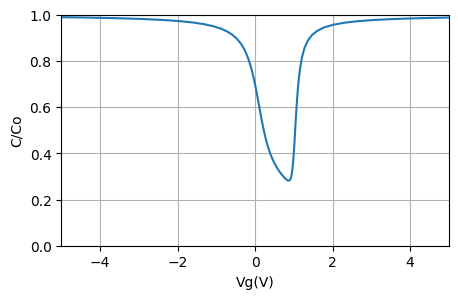

In [4]:
# Appendix C MOS C-V supplement, Low frequency 
from constant import q,m0,e0,hbar,mn,e_si,k,kB,mp,kT_q,Eg,Nc,Nv,ni,mun,mup,e_ox
import numpy as np, matplotlib.pyplot as plt 
from scipy.integrate import quad

T=300; Ks=e_si; Ko=e_ox; ni=ni(T); kT=k*T
NA=1e15; xo=0.1e-4

# computed constants
UF=np.log(NA/ni)
LD=np.sqrt((kT*Ks*e0)/(2*q*ni)) #cm
print(UF, LD)

# Gate voltage computation
US=np.linspace(UF-21, UF+21, 101)
F=np.sqrt(np.exp(UF)*(np.exp(-US)+US-1)+np.exp(-UF)*(np.exp(US)-US-1))
Vg=kT*(US+np.sign(US)*(Ks*xo)/(Ko*LD)*F)

# Low-frequency capacitance computation
DENOML=np.exp(UF)*(1-np.exp(-US))+np.exp(-UF)*(np.exp(US)-1)
WL=np.sign(US)*LD*(2*F)/DENOML
cL=1/(1+(Ko*WL)/(Ks*xo))

plt.figure(figsize=(5,3))
plt.plot(Vg,cL)
plt.ylim(0,1), plt.xlim(-5,5), plt.ylabel("C/Co"), plt.xlabel("Vg(V)")
plt.grid(True)
plt.show()

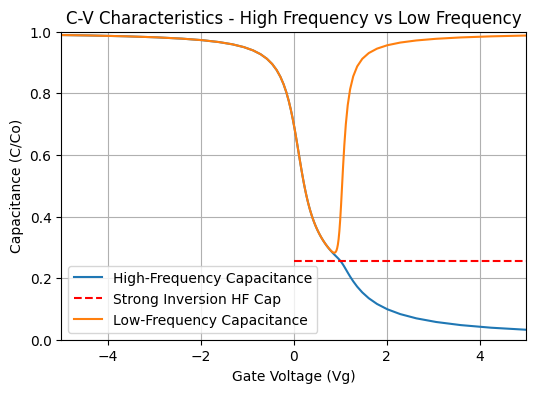

In [26]:
#US<3 이하에서는 cL을 따르고, US>=3에서는 cH를 따른다.
#nn=0은 처음 integral을 하고, 다음으로 nn=1이면 cH를 적분한다.
#하지만 수식이 틀린 것 같음.

import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt

def cvintegrand(U, UF):
    F = np.sqrt(np.exp(UF) * (np.exp(-U) + U - 1) + np.exp(-UF) * (np.exp(U) - U - 1))
    return (1 - np.exp(-U)) * (np.exp(U) - U - 1) / (2 * F**3)

# Constants
NA = 1e15  # Example doping concentration
ni = 1.0e10  # Intrinsic carrier concentration
kT = 0.0259  # Thermal voltage (V)
Ks = 11.8  # Silicon dielectric constant
e0 = 8.85e-14  # Vacuum permittivity (F/cm)
q = 1.6e-19  # Electron charge (C)
xo = 0.1e-4  # Oxide thickness (cm)
Ko = 3.9  # Oxide dielectric constant

UF = np.log(NA / ni)
LD = np.sqrt((kT * Ks * e0) / (2 * q * ni))

# Compute gate voltage
US=np.linspace(UF-21, UF+21, 101)
F = np.sqrt(np.exp(UF) * (np.exp(-US) + US - 1) + np.exp(-UF) * (np.exp(US) - US - 1))
Vg = kT * (US + np.sign(US) * (Ks * xo) / (Ko * LD) * F)

# Compute low-frequency capacitance
DENOML = np.exp(UF) * (1 - np.exp(-US)) + np.exp(-UF) * (np.exp(US) - 1)
WL = np.sign(US) * LD * (2 * F) / DENOML
cL = 1 / (1 + (Ko * WL) / (Ks * xo))

# Compute high-frequency capacitance
cH = np.zeros_like(US)
INTG = 0
nn = 0

for ii in range(len(US)):
    if US[ii] < 3:
        cH[ii] = cL[ii]  # Use low-frequency capacitance for US < 3
    else:
        if nn == 0:
            INTG, _ = quad(cvintegrand, 3, US[ii], args=(UF,))
            nn = 1
        else:
            INTG += quad(cvintegrand, US[ii - 1], US[ii], args=(UF,))[0]
        
        d = (np.exp(US[ii]) - np.exp(1)) / (F[ii] * np.exp(UF)) * INTG
        DENOMH = np.exp(UF) * (1 - np.exp(-US[ii])) + ((np.exp(-UF) * US[ii] - 1) / (1 + d))
        WH = LD * (2 * F[ii]) / DENOMH
        cH[ii] = 1 / (1 + (Ko * WH) / (Ks * xo))

# Threshold capacitance at strong inversion
phif = kT * np.log(NA / ni)
WT = np.sqrt(2 * Ks * e0 / (q * NA) * (2 * phif))
C_strong=1 / (1 + (Ko * WT) / (Ks * xo))

# Plot the results
plt.figure(figsize=(6, 4))
plt.plot(Vg, cH, label="High-Frequency Capacitance")
plt.plot([0, 5], [C_strong, C_strong], 'r--', label="Strong Inversion HF Cap")
plt.plot(Vg, cL, label="Low-Frequency Capacitance")
plt.xlabel("Gate Voltage (Vg)"), plt.ylabel("Capacitance (C/Co)")
plt.title("C-V Characteristics - High Frequency vs Low Frequency")
plt.xlim(-5, 5), plt.ylim(0, 1)
plt.legend(), plt.grid()
plt.show()


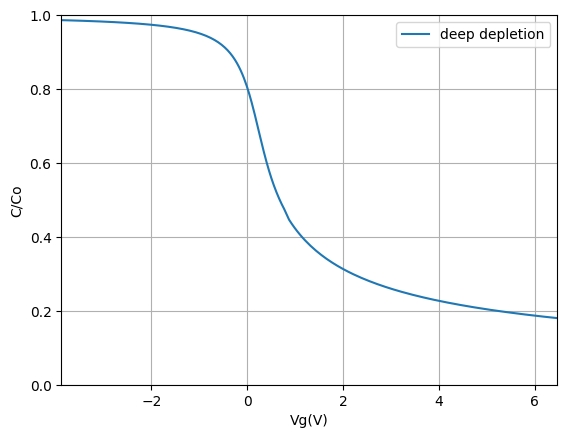

In [28]:
# Problem 16.16 Deep depletion p-type MOS C-V 
from constant import q,m0,e0,hbar,mn,e_si,k,kB,mp,kT_q,Eg,Nc,Nv,ni,mun,mup,e_ox
import numpy as np, matplotlib.pyplot as plt 
from scipy.integrate import quad

T=300; Ks=e_si; Ko=e_ox; ni=ni(T); kT=k*T
NA=7.8e14; xo=0.2e-4

# computed constants
UF=np.log(NA/ni)
LD=np.sqrt((kT*Ks*e0)/(2*q*ni)) #cm

# Gate voltage computation
US=np.linspace(UF-21, UF, 101)
F=np.sqrt(np.exp(UF)*(np.exp(-US)+US-1)+np.exp(-UF)*(np.exp(US)-US-1))
Vg1=kT*(US+np.sign(US)*(Ks*xo)/(Ko*LD)*F)

# C-V computation for US<UF(or VG<VInversion)
DENOM1=np.exp(UF)*(1-np.exp(-US))+np.exp(-UF)*(np.exp(US)-1)
W1=np.sign(US)*LD*(2*F)/DENOM1
c1=1/(1+(Ko*W1)/(Ks*xo))

# C-V computation for US>UF(or VInversion<VG<5VT)
FI=np.sqrt(np.exp(UF)*(np.exp(-UF)+UF-1)+np.exp(-UF)*(np.exp(UF)-UF-1))
VI=kT*(UF+(Ks*xo)/(Ko*LD)*FI)
phiF=kT*UF
VT=2*phiF+(Ks*xo/Ko)*np.sqrt((4*q*NA*phiF)/(Ks*e0))
Vdelta=(q/2)*(Ks*xo**2*NA)/(Ko**2*e0)

Vg2=np.linspace(VI+0.1, 5*VT, 101)
c2=1/np.sqrt(1+Vg2/Vdelta)

c=np.array([])
Vg=np.array([])
c=np.hstack((c1,c2))
Vg=np.hstack((Vg1,Vg2))

plt.plot(Vg,c, label="deep depletion")
plt.xlabel("Vg(V)"), plt.ylabel("C/Co")
plt.xlim(-3*VT,5*VT), plt.ylim(0,1)
plt.grid(True), plt.legend()
plt.show()

#### Practical Observations
### 16.5 Summary and Concluding Comments

### Problems

In [26]:
# Problem 16.4, page 601
from constant import q,m0,e0,hbar,mn,e_si,k,kB,mp,kT_q,Eg,Nc,Nv,ni,mun,mup,e_ox
import numpy as np, matplotlib.pyplot as plt

#NA="+", ND="-"
T=300; xo=0.1*1e-4; ND=1e15; kT=k*T; ni=ni(T); Ks=e_si; Ko=e_ox
s=-1

phif=s*kT*np.log(ND/ni)
W=np.sqrt(2*Ks*e0/(s*q*ND)*(2*phif))
Es=s*q*ND/(Ks*e0)*W
Vg=2*phif+Ks/Ko*xo*Es
print(f"phif={phif:.4f}V, W={W:.4e}cm, Es={Es:.4e}/cm3, Vg={Vg:.4f}V")

phif=-0.2976V, W=8.7733e-05cm, Es=-1.3569e+04/cm3, Vg=-1.0023V


In [27]:
# Problem 16.6
C=1/(1+(Ko*W)/(Ks*xo))
print(C)

0.2548140032271687


In [30]:
VT=-(2*np.abs(phif)+Ks/Ko*xo*np.sqrt(2*q*ND/(Ks*e0)*2*np.abs(phif)))
print(VT)

-1.0022829080857085


In [46]:
# Problem 16.7
from constant import q,m0,e0,hbar,mn,e_si,k,kB,mp,kT_q,Eg,Nc,Nv,ni,mun,mup,e_ox
import numpy as np, matplotlib.pyplot as plt
#EFi=kT*np.log(ND/ni(T))

T=300; Ks=e_si; Ko=e_ox; ni=ni(T); kT=k*T
EFi=0.29
xo=2e-5
ND=ni*np.exp(EFi/kT)
phis=-EFi
Vg=phis-Ks*xo/Ko*np.sqrt(2*q*ND/(Ks*e0)*(-phis))
Dphiox=Vg-phis
Vdelta=-q/2*Ks*xo**2/(Ko**2*e0)*ND
CdivCo=1/np.sqrt(1+Vg/Vdelta)
print('ND=%0.3ecm-3, phis=%0.3fV, Vg=%0.3fV, Dphiox=%0.3fV, Vdelta=%0.3fV, CdivCo=%0.3f' % (ND,phis,Vg,Dphiox,Vdelta,CdivCo))

ND=7.450e+14cm-3, phis=-0.290V, Vg=-0.781V, Dphiox=-0.491V, Vdelta=-0.207V, CdivCo=0.458


In [63]:
# Problem 16.13
from constant import q,m0,e0,hbar,mn,e_si,k,kB,mp,kT_q,Eg,Nc,Nv,ni,mun,mup,e_ox
import numpy as np, matplotlib.pyplot as plt

T=300; Ks=e_si; Ko=e_ox; ni=ni(T); kT=k*T
A=3e-3
Cmax=100e-12
C=20e-12
xo=Ko*e0*A/Cmax #Cmax=Co=Ko*e0*A/xo
WT=Ks*xo/Ko*(Cmax/C-1) #C=Cmax/(1+Ko*WT/(Ks*xo)) inv(omega to infty)

Net=5e14
phif=kT*np.log(Net/ni)
WTp=np.sqrt(2*Ks*e0/(q*Net)*(2*phif))

print('xo=%0.3ecm, WT=%0.3ecm, phif=%0.3fV, WTp=%0.3eum' % (xo,WT,phif,WTp))

xo=1.036e-05cm, WT=1.243e-04cm, phif=0.280V, WTp=1.203e-04um


In [73]:
# Problem 16.14
from constant import q,m0,e0,hbar,mn,e_si,k,kB,mp,kT_q,Eg,Nc,Nv,ni,mun,mup,e_ox
import numpy as np, matplotlib.pyplot as plt

T=300; Ks=e_si; Ko=e_ox; ni=ni(T); kT=k*T
A=1e-3
xo=0.1e-4
ND=2e15
Cmax=Ko*e0*A/xo
phif=-kT*np.log(ND/ni)
WT=np.sqrt(2*Ks*e0/(q*ND)*(-2*phif))
Cmin=Cmax/(1+(Ko*WT/(Ks*xo)))
Vg=2*phif
VT=2*phif-(Ks*xo)/Ko*np.sqrt(2*q*ND/(Ks*e0)*(-2*phif))

print('Cmax=%0.3eF, phif=%0.3fV, WT=%0.3ecm, Cmin=%0.3eF, Vg=%0.3fV, VT=%0.3fV' % (Cmax,phif,WT,Cmin,Vg,VT))

Cmax=3.453e-11F, phif=-0.316V, WT=6.388e-05cm, Cmin=1.104e-11F, Vg=-0.631V, VT=-1.224V


In [34]:
# Problem 16.17
from constant import q,m0,e0,hbar,mn,e_si,k,kB,mp,kT_q,Eg,Nc,Nv,ni,mun,mup,e_ox
import numpy as np, matplotlib.pyplot as plt

T=300; Ks=e_si; Ko=e_ox; ni=ni(T); kT=k*T
A=4.75e-3
Co=82e-12
CdivCo_inv=0.39
LD=2.91e-3
xo=Ko*e0*A/Co
Weff_inv=Ks*xo/Ko*(1/CdivCo_inv-1) #C_inv=Co/(1+Ko*Weff_inv/(Ks*xo))
Ratio=Weff_inv/LD
print('xo=%0.3ecm, Weff_inv=%0.3ecm, Ratio=%0.3e' % (xo,Weff_inv,Ratio))

xo=2.000e-05cm, Weff_inv=9.386e-05cm, Ratio=3.225e-02


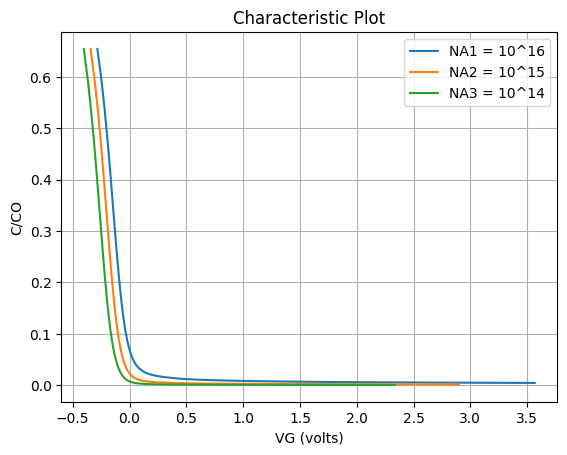

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Initialization and Input
NA1 = 1e16
NA2 = 1e15
NA3 = 1e14
xo = 0.1e-6

# Defining Constants and Parameters
e0 = 8.854e-14
q = 1.6e-19
k = 8.617e-5
KS = 11.8
KO = 3.9
ni = 1.0e10
T = 300
kT = k * T

# Computing Constants
UF1 = np.log(NA1 / ni)
UF2 = np.log(NA2 / ni)
UF3 = np.log(NA3 / ni)
LD = np.sqrt((kT * KS * e0) / (2 * q * ni))

# Computation for the condition US < UF
US1 = np.arange(UF1 - 21, UF1, 0.5)
US2 = np.arange(UF2 - 21, UF2, 0.5)
US3 = np.arange(UF3 - 21, UF3, 0.5)

def compute_F(UF, US):
    return np.sqrt(np.exp(UF) * (np.exp(-US) + US - 1) + np.exp(-UF) * (np.exp(US) - US - 1))

def compute_VG(UF, US, F):
    return kT * (US + (US / np.abs(US)) * (KS * xo) / (KO * LD) * F)

def compute_C(UF, US, F):
    DENOM = np.exp(UF) * (1 - np.exp(-US)) + np.exp(-UF) * (np.exp(US) - 1)
    W = (US / np.abs(US)) * LD * (2 * F) / DENOM
    return 1.0 / (1 + (KO * W) / (KS * xo))

F1, F2, F3 = compute_F(UF1, US1), compute_F(UF2, US2), compute_F(UF3, US3)
VG1, VG2, VG3 = compute_VG(UF1, US1, F1), compute_VG(UF2, US2, F2), compute_VG(UF3, US3, F3)
c1, c2, c3 = compute_C(UF1, US1, F1), compute_C(UF2, US2, F2), compute_C(UF3, US3, F3)

# Computation for the condition US > UF
FI1, FI2, FI3 = compute_F(UF1, UF1), compute_F(UF2, UF2), compute_F(UF3, UF3)
phiF1, phiF2, phiF3 = kT * UF1, kT * UF2, kT * UF3
VI1, VI2, VI3 = kT * (UF1 + (KS * xo) / (KO * LD) * FI1), kT * (UF2 + (KS * xo) / (KO * LD) * FI2), kT * (UF3 + (KS * xo) / (KO * LD) * FI3)
VT1, VT2, VT3 = 2 * phiF1 + (KS * xo / KO) * np.sqrt((4 * q * NA1 * phiF1) / (KS * e0)), 2 * phiF2 + (KS * xo / KO) * np.sqrt((4 * q * NA2 * phiF2) / (KS * e0)), 2 * phiF3 + (KS * xo / KO) * np.sqrt((4 * q * NA3 * phiF3) / (KS * e0))
Vdelta1, Vdelta2, Vdelta3 = (q / 2) * (KS * xo**2 * NA1) / (KO**2 * e0), (q / 2) * (KS * xo**2 * NA2) / (KO**2 * e0), (q / 2) * (KS * xo**2 * NA3) / (KO**2 * e0)

VGA, VGB, VGC = np.arange(VI1 + 0.1, 5 * VT1, 0.1), np.arange(VI2 + 0.1, 5 * VT2, 0.1), np.arange(VI3 + 0.1, 5 * VT3, 0.1)
cA, cB, cC = 1.0 / np.sqrt(1 + VGA / Vdelta1), 1.0 / np.sqrt(1 + VGB / Vdelta2), 1.0 / np.sqrt(1 + VGC / Vdelta3)

# Combining the above parameters
calpha, cbeta, cgamma = np.concatenate((c1, cA)), np.concatenate((c2, cB)), np.concatenate((c3, cC))
VGalpha, VGbeta, VGgamma = np.concatenate((VG1, VGA)), np.concatenate((VG2, VGB)), np.concatenate((VG3, VGC))

# Plot
plt.plot(VGalpha, calpha, label="NA1 = 10^16")
plt.plot(VGbeta, cbeta, label="NA2 = 10^15")
plt.plot(VGgamma, cgamma, label="NA3 = 10^14")
plt.xlabel('VG (volts)')
plt.ylabel('C/CO')
plt.title("Characteristic Plot")
plt.legend()
plt.grid()
plt.show()


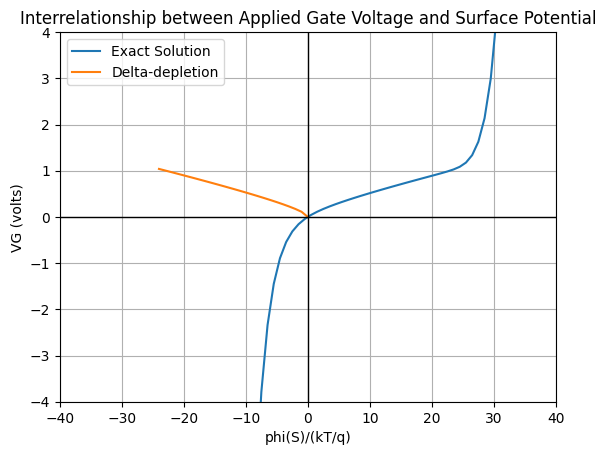

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Defining Constants
kS = 11.8
kO = 3.9
xo = 1.0e-5
NA = 1e15
kT = 0.0259
e0 = 8.85e-14
q = 1.6e-19
ni = 1.0e10
LD = np.sqrt((kS * e0 * kT) / (2 * q * ni))
N = abs(NA)
sign = -NA / N
UF = sign * np.log(N / ni)

# Computing Exact Solution
US = np.arange(UF - 21, UF + 22, 1)
S = np.sign(US)
F = np.sqrt(np.exp(UF) * (np.exp(-US) + US - 1) + np.exp(-UF) * (np.exp(US) - US - 1))
VG = kT * (US + S * (kS * xo) / (kO * LD) * F)

# Computing Delta-depletion Approximation
pF = np.log(N / ni)
ps = np.arange(0, 2 * pF + 1, 1)
P = (kS / kO) * xo
Q = (2 * q * NA) / (kS * e0)
VG_d = (ps * kT) + (P * np.sqrt(Q * ps * kT))

# Ensure Us has the correct range
Us = -ps

# Plot
plt.figure()
plt.plot(-US, -VG, label='Exact Solution')
plt.plot(Us, VG_d, label='Delta-depletion')
plt.grid()
plt.axis([-40, 40, -4, 4])
plt.xlabel('phi(S)/(kT/q)')
plt.ylabel('VG (volts)')
plt.axhline(0, color='black', linewidth=1)
plt.axvline(0, color='black', linewidth=1)
plt.legend(loc='upper left')
plt.title("Interrelationship between Applied Gate Voltage and Surface Potential")
plt.show()


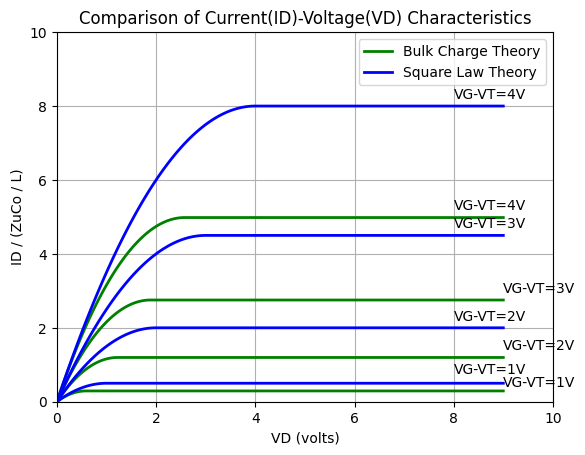

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Defining Constants and Parameters
q = 1.60e-19
e0 = 8.85e-14
kT = 0.0259
ni = 1.0e10
KS = 11.8
KO = 3.9
NA = 1.0e20
xo = 0.1e-6

# Computed Parameters
phiF = kT * np.log(NA / ni)
WT = np.sqrt((4 * KS * e0 * phiF) / (q * NA))
Co = KO * e0 / xo
VW = q * NA * WT / Co

# ID-VD COMPUTATION
plt.figure()
for VGT in range(4, 0, -1):  # VGT = VG - VT
    # Computation for Square Law Theory
    VDsq = np.linspace(0, VGT, 100)
    IDsq = VGT * VDsq - (VDsq ** 2) / 2
    IDSATsq = VGT ** 2 / 2
    VDsq = np.append(VDsq, 9)
    IDsq = np.append(IDsq, IDSATsq)
    
    # Computation for Bulk Charge Theory
    A = VGT / (2 * phiF)
    B = 1 + VW / (4 * phiF)
    VDsat = VGT - VW * (np.sqrt(A + B ** 2) - B)
    VD = np.linspace(0, VDsat, 100)
    ID1 = VGT * VD - (VD ** 2) / 2
    VDF = VD / (2 * phiF)
    ID2 = (4 / 3) * VW * phiF * ((1 + VDF) ** 1.5 - (1 + 1.5 * VDF))
    ID = ID1 - ID2
    
    IDsat1 = VGT * VDsat - (VDsat ** 2) / 2
    VDFsat = VDsat / (2 * phiF)
    IDsat2 = (4 / 3) * VW * phiF * ((1 + VDFsat) ** 1.5 - (1 + 1.5 * VDFsat))
    IDsat = IDsat1 - IDsat2
    
    VD = np.append(VD, 9)
    ID = np.append(ID, IDsat)
    
    # Plots
    plt.plot(VD, ID, 'g-', linewidth=2.0, label='Bulk Charge Theory' if VGT == 4 else "")
    plt.plot(VDsq, IDsq, 'b-', linewidth=2.0, label='Square Law Theory' if VGT == 4 else "")
    
    if VGT == 4:
        plt.text(8, IDsat + 0.2, 'VG-VT=4V')
        plt.text(8, IDSATsq + 0.2, 'VG-VT=4V')
    elif VGT == 3:
        plt.text(9, IDsat + 0.2, 'VG-VT=3V')
        plt.text(8, IDSATsq + 0.2, 'VG-VT=3V')
    elif VGT == 2:
        plt.text(9, IDsat + 0.2, 'VG-VT=2V')
        plt.text(8, IDSATsq + 0.2, 'VG-VT=2V')
    else:
        plt.text(9, IDsat + 0.1, 'VG-VT=1V')
        plt.text(8, IDSATsq + 0.25, 'VG-VT=1V')

plt.grid()
plt.axis([0, 10, 0, 10])
plt.xlabel('VD (volts)')
plt.ylabel('ID / (ZuCo / L)')
plt.legend()
plt.title("Comparison of Current(ID)-Voltage(VD) Characteristics")
plt.show()

